# Seaborn

Quick Navigate
- [Heat Map](#heat-map)
- [Join Plot](#join-plot)
- [Pair Plot](#pair-plot)
- [Count Plot And Bar Plot](#count-plot--bar-plot)
- [Box Plot](#box-plot)
- [Voilin Plot](#violin-plot)
- [Strip & Swarm Plots](#strip-plot--swarm-plot)


In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("dark_background")


### Loading Data

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---

### Checking the data

In [5]:
sum(df.isnull().sum())

0

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


--- 

### Anlysis with plots

#### Heat Map

<AxesSubplot:>

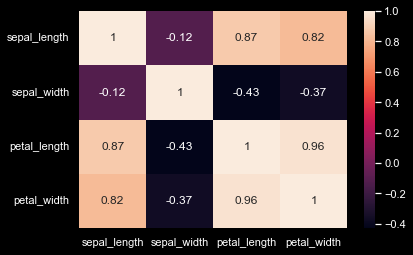

In [18]:
# Corelation with heatmap
sns.heatmap(df.corr(), annot=True)

#### **Join Plot** 
Allows us to visualize realtionship between two variables

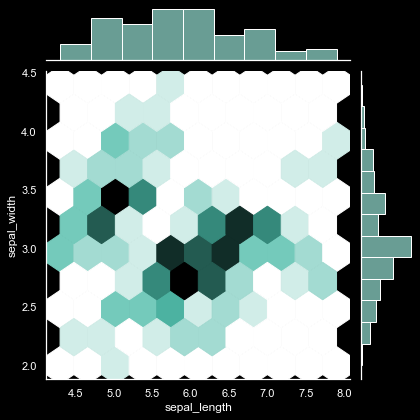

In [43]:
sns.jointplot(
    x='sepal_length',
    y='sepal_width', 
    data=df, 
    kind='hex'
)


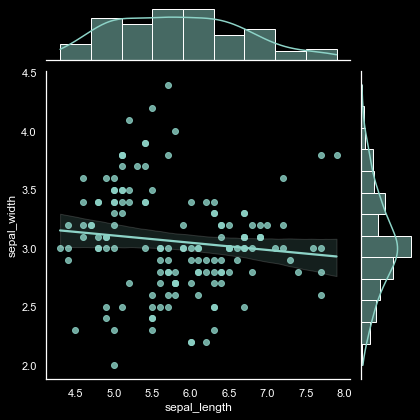

In [44]:
sns.jointplot(
    x='sepal_length',
    y='sepal_width',
    data=df,
    kind='reg',
)


#### **Pair Plot**
Permutaions of all the numerical elements just draws 
- Histogram
- Scatter Plots (2)

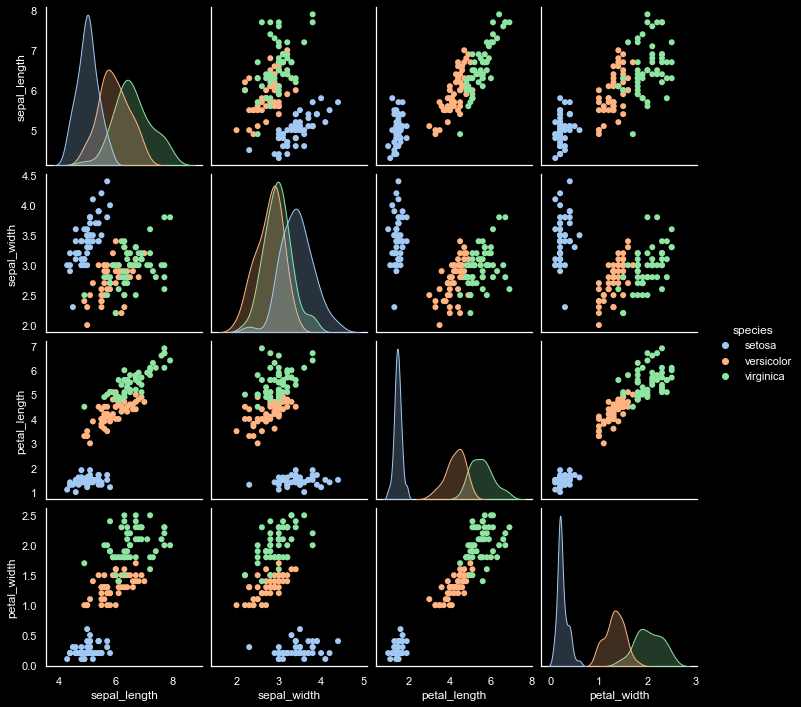

In [33]:
sns.pairplot(df, hue='species', palette='pastel', plot_kws={'edgecolor':'none'})

#### Count Plot & Bar Plot

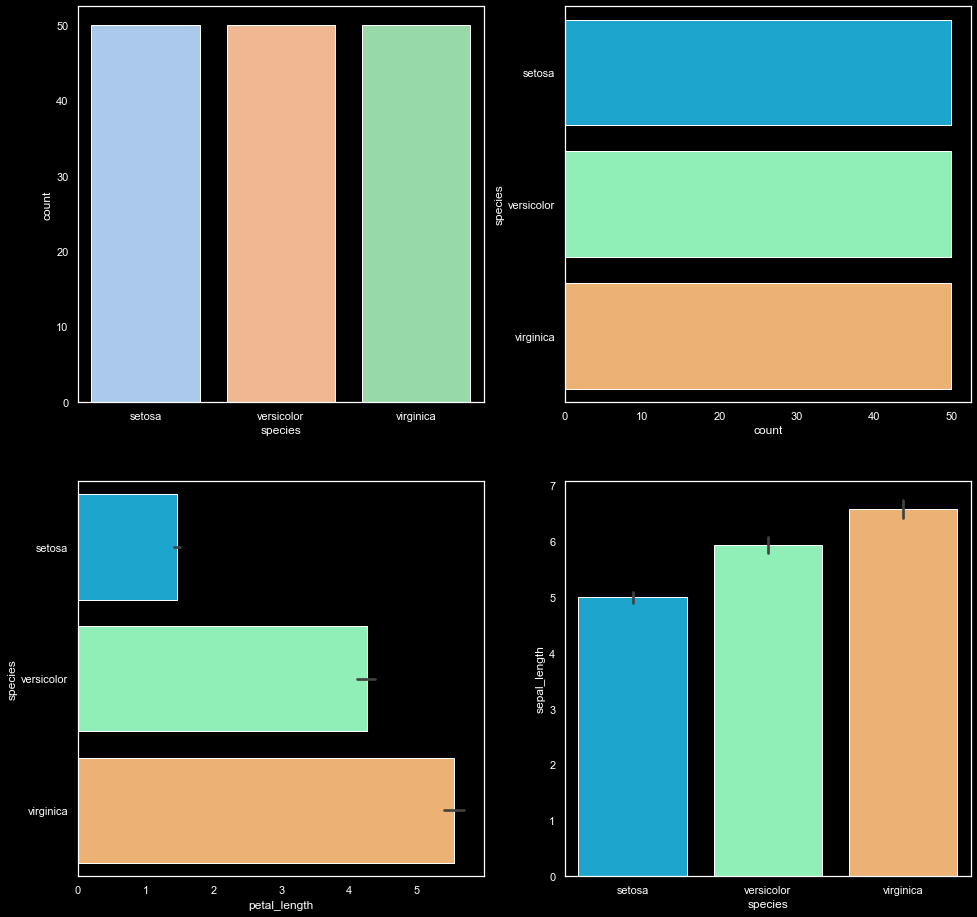

In [78]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

sns.countplot(x='species', data=df, palette='pastel', ax=ax[0][0])
sns.countplot(y='species', data=df, palette='rainbow', ax=ax[0][1])

sns.barplot(x="petal_length",y='species', data=df, palette='rainbow', ax=ax[1][0])
sns.barplot(y="sepal_length",x='species', data=df, palette='rainbow', ax=ax[1][1])

del fig, ax

#### Box Plot
A box and whisker plot—also called a box plot—displays the **five-number summary** of a set of data. The five-number summary is the minimum, first quartile i.e 25th%, median, third quartile i.e 75th%, and maximum. In a box plot, we draw a box from the first quartile to the third quartile.

It's easier to visually observe the outliers in box-plots

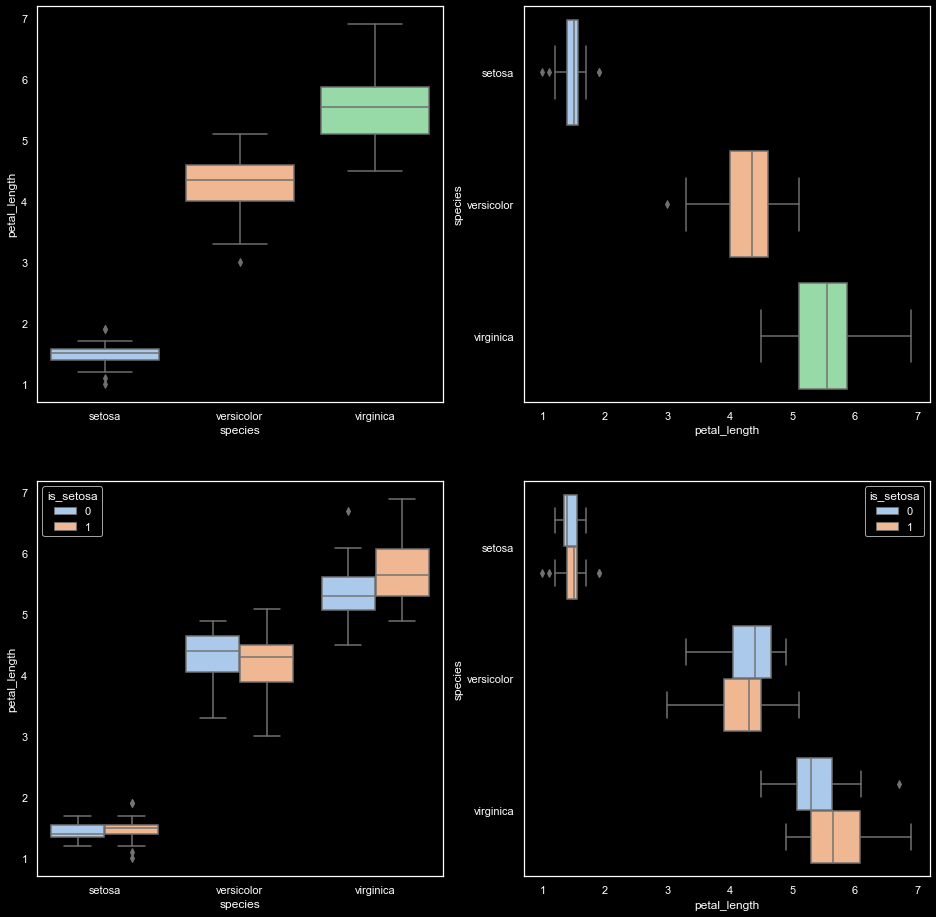

In [80]:
# adding another categoraical var into the dataset
import random
df_test = df.copy()
df_test['is_setosa'] = [random.randint(0, 1) for _ in range(len(df_test))]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
# 1st row
sns.boxplot(x='species', y='petal_length', data=df, palette='pastel', ax=ax[0][0])
sns.boxplot(y='species', x='petal_length', data=df, palette='pastel', ax=ax[0][1])
# 2nd row
sns.boxplot(x='species', y='petal_length', data=df_test, hue="is_setosa", palette='pastel', ax=ax[1][0])
sns.boxplot(y='species', x='petal_length', data=df_test, hue="is_setosa", palette='pastel', ax=ax[1][1])

# deleting the unnecesary vars
del df_test, fig, ax

#### Violin Plot
Basically a box plot with a distribution curve.

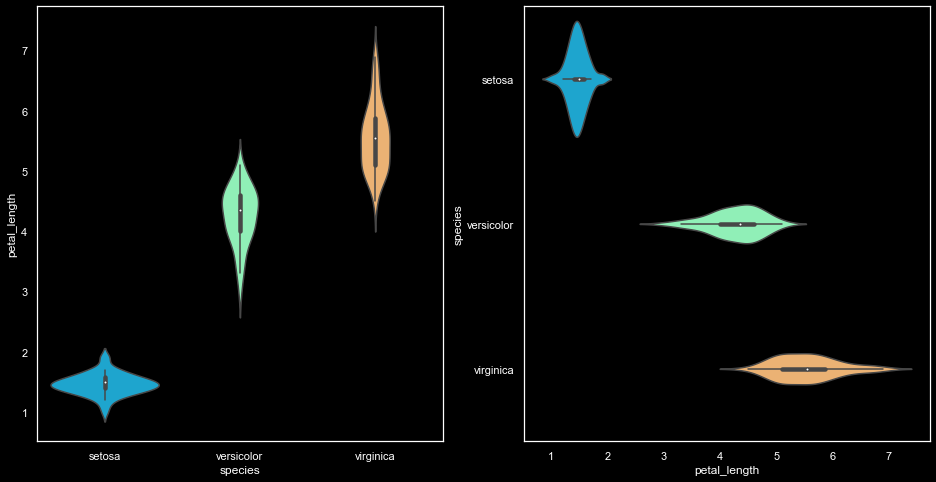

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.violinplot(x='species', y='petal_length', data=df, palette='rainbow', ax = ax[0])
sns.violinplot(y='species', x='petal_length', data=df, palette='rainbow', ax = ax[1])

del fig, ax

#### Strip Plot & Swarm Plot
**Strip Plot** is a combination of a box & scatter plots.

**Swarm Plot** is a combination of a box, scatter and a violin plots.


<AxesSubplot:xlabel='petal_length', ylabel='species'>

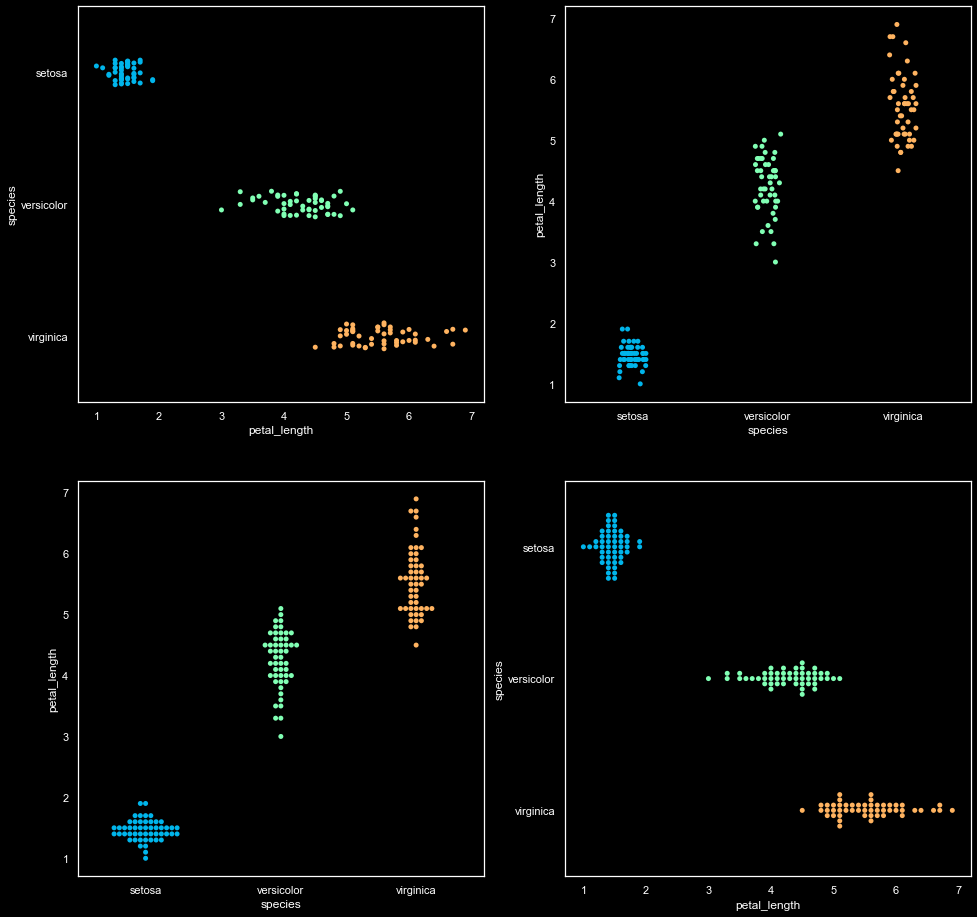

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# Strip Plot
sns.stripplot(y='species', x='petal_length', data=df, palette='rainbow', ax=ax[0][0])
sns.stripplot(x='species', y='petal_length', data=df, palette='rainbow', ax=ax[0][1])
# Swarm Plot
sns.swarmplot(x='species', y='petal_length', data=df, palette='rainbow', ax=ax[1][0])
sns.swarmplot(y='species', x='petal_length', data=df, palette='rainbow', ax=ax[1][1])


---